# Code Functionality on Prinicpal Component Analysis (PCA)

# What is PCA?

In simple words, PCA is a method of obtaining important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features by taking a projection of irrelevant dimensions from a high dimensional data set with a motive to capture as much information as possible. With fewer variables obtained while minimising the loss of information, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

It is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.

# What are the Principal Components?

A principal component is a normalized linear combination of the original predictors in a data set.

Let’s say we have a set of predictors as X¹, X²...,Xp

The principal component can be written as:

Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp

* Z¹ is first principal component
* X¹..Xp are normalized predictors. Normalized predictors have mean equals to zero and standard deviation equals to one.

First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component. No other component can have variability higher than first principal component.

**The first principal** component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.

---------------------------------------------------------------------------
Similarly, we can compute the second principal component also.

 
**Second principal component (Z²)** is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. In other words, the correlation between first and second component should is zero. It can be represented as:

Z² = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp

If the two components are uncorrelated, their directions should be orthogonal.

# Normalization of variables is necessary in PCA.

**Reason**: 

The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

**Now let's understand this concept with help of example dataset using Scikit-learn and find out the components with maximum variance.**

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the dataset
data=pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#get the summary of the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
columns_names=data.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


df.columns.tolist() fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets.

In [7]:
data.shape

(14999, 10)

In [8]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.

# Visualizing correlation using Seaborn library

Text(0.5, 1.0, 'Correlation Between different features')

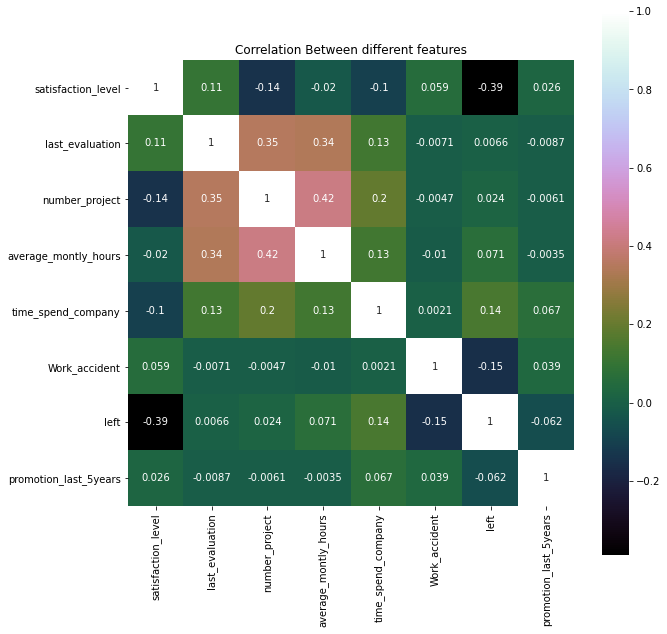

In [10]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.title('Correlation Between different features')

**Doing some Visualization before moving to PCA**

In [11]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
sales=data.groupby('sales').sum()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [13]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
groupby_sales=data.groupby('sales').mean()
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [15]:
IT=groupby_sales['satisfaction_level'].IT
RandD=groupby_sales['satisfaction_level'].RandD
accounting=groupby_sales['satisfaction_level'].accounting
hr=groupby_sales['satisfaction_level'].hr
management=groupby_sales['satisfaction_level'].management
marketing=groupby_sales['satisfaction_level'].marketing
product_mng=groupby_sales['satisfaction_level'].product_mng
sales=groupby_sales['satisfaction_level'].sales
support=groupby_sales['satisfaction_level'].support
technical=groupby_sales['satisfaction_level'].technical
technical


0.6078970588235295

Here we will try to get satisfaction level of each department

Text(0.5, 1.0, 'Mean Satisfaction Level of each department')

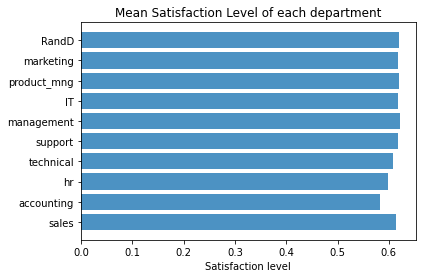

In [18]:
department_name=('sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD')
department=(sales, accounting, hr, technical, support, management,
       IT, product_mng, marketing, RandD)
y_pos = np.arange(len(department))
x=np.arange(0,1,0.1)

plt.barh(y_pos, department, align='center', alpha=0.8)
plt.yticks(y_pos,department_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

# Principal Component Analysis

In [19]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dropping Sales and Salary columns.

In [20]:
data_drop=data.drop(labels=['sales','salary'],axis=1)
data_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


bring "left" column to the front as it is the label and not the feature.

In [21]:
cols=data_drop.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method

In [22]:
cols.insert(0,cols.pop(cols.index('left')))
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [23]:
data_drop = data_drop.reindex(columns= cols)

By using df_drop.reindex(columns= cols) we are converting list to columns again





separating features of our dataframe from the labels

In [24]:
X = data_drop.iloc[:,1:8].values
y = data_drop.iloc[:,0].values
X

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

In [25]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
np.shape(X)

(14999, 7)

Thus X is now matrix with 14999 rows and 7 columns

In [27]:
np.shape(y)

(14999,)

y is now matrix with 14999 rows and 1 column



# Data Standardization

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [28]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

**Computing Eigenvectors and Eigenvalues**

Before computing Eigen vectors and values we need to calculate covariance matrix.

In [29]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [30]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


Equivalently we could have used Numpy np.cov to calculate covariance matrix

Text(0.5, 1.0, 'Correlation between different features')

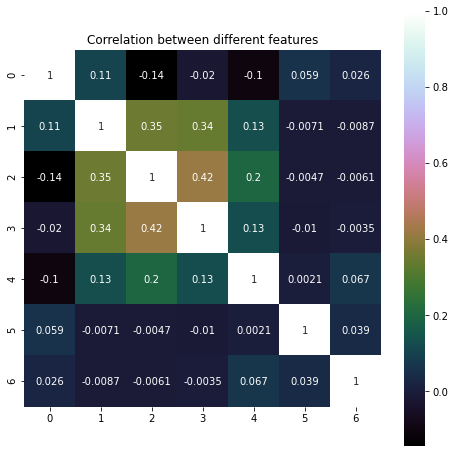

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

**Eigen decomposition of the covariance matrix**

In [32]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


# Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [33]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8301743138755007
1.1265960639915473
1.0603613622840828
0.9559864740066222
0.8454816637143457
0.6336358744830215
0.5482309765420617


**Explained Variance** After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [34]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

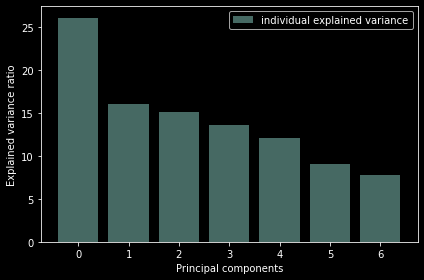

In [35]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

* The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone.

* The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.
* But those information cannot be ignored since they both contribute almost 17% of the data.
* But we can drop the last component as it has less than 10% of the variance

**Projection Matrix**

* The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace.
* Suppose only 1st and 2nd principal component shares the maximum amount of information say around 90%.Hence we can drop other components.
* Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [36]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08797699  0.79752505]
 [-0.50695734  0.33180877]
 [-0.5788351  -0.10338032]
 [-0.54901653  0.10388959]
 [-0.31354922 -0.28404472]
 [ 0.01930249  0.37489883]
 [-0.00996933  0.10557298]]


**Projection Onto the New Feature Space** In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation **Y=X×W**

In [37]:
Y = X_std.dot(matrix_w)
Y


array([[ 1.90035018, -1.12083103],
       [-2.1358322 ,  0.2493369 ],
       [-3.05891625, -1.68312693],
       ...,
       [ 2.0507165 , -1.182032  ],
       [-2.91418496, -1.42752606],
       [ 1.91543672, -1.17021407]])

# PCA in Scikit-Learn

Text(0, 0.5, 'Cumulative explained variance')

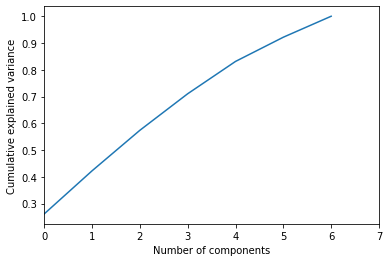

In [38]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

In [39]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [40]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ...
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [41]:
Y_sklearn.shape

(14999, 6)

* Thus **Principal Component Analysis** is used to remove the redundant features from the datasets without losing much information.
* These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.
* PCA works best on data set having 3 or higher dimensions.
* Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.